BOSTON HOUSING DATA using logistic regression

In [89]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [68]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [69]:
boston_dataset.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [70]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [71]:
boston['MEDV'] = boston_dataset.target

In [11]:
#boston['MEDV'] = boston.MEDV.map(lambda x: 1 if x>22.5 else 0)

In [73]:
boston['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [74]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

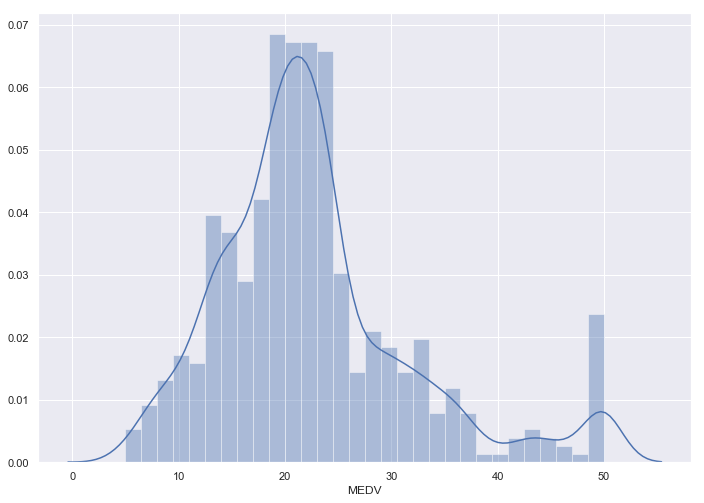

In [38]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

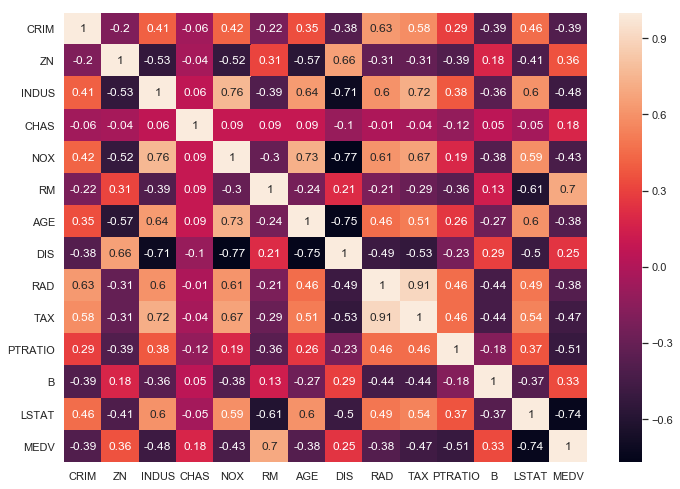

In [39]:
# Outlier check
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

we select those features which have a high correlation with our target variable MEDV. 
 By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7)
 where as LSTAT has a high negative correlation with MEDV(-0.74)

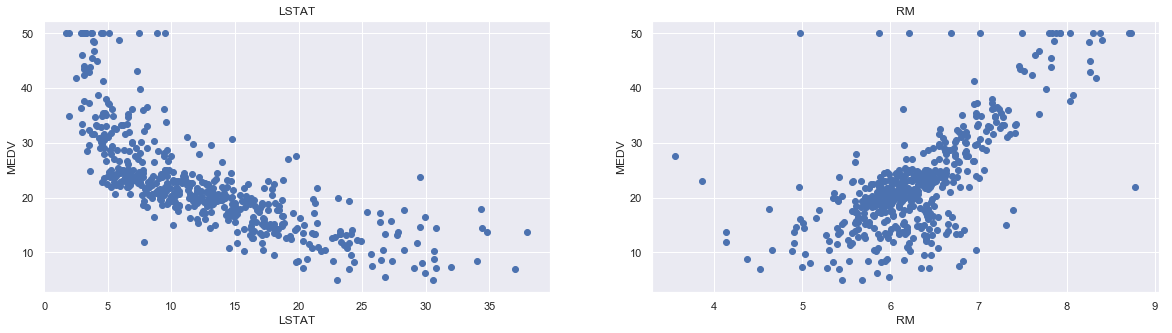

In [75]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [105]:
X = pd.DataFrame(np.c_[boston['LSTAT']], columns = ['LSTAT'])
Y = boston['MEDV']

In [106]:
x_training_set, x_test_set, y_training_set, y_test_set = train_test_split(X,y,test_size=0.10, 
                                                                          random_state=42,
                                                                          shuffle=True)

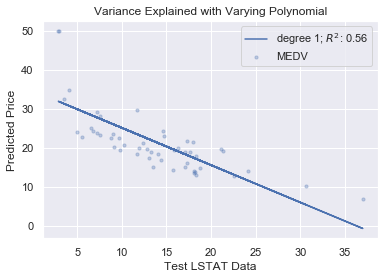

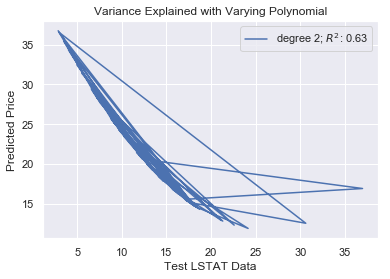

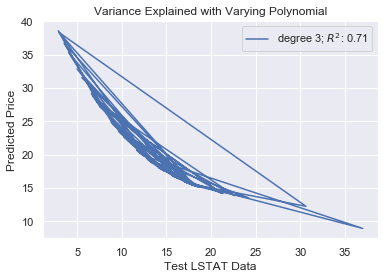

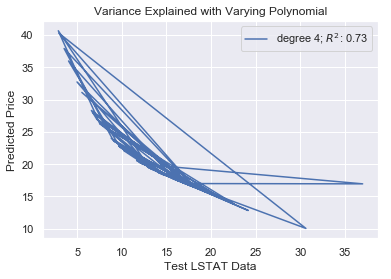

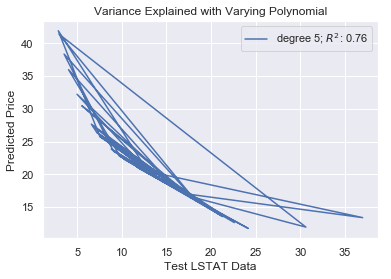

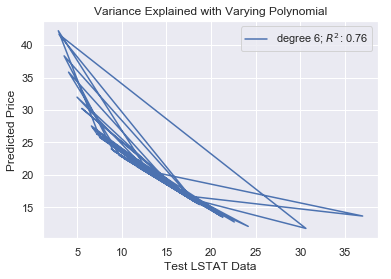

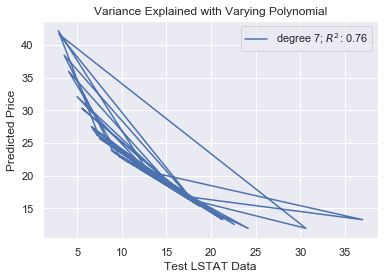

In [90]:
# Polynomial Regression-nth order
plt.scatter(x_test_set, y_test_set, s=10, alpha=0.3)

for degree in [1,2,3,4,5,6,7]:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x_training_set,y_training_set)
    y_plot = model.predict(x_test_set)
    plt.plot(x_test_set, y_plot, label="degree %d" % degree+'; $R^2$: %.2f' % model.score(x_test_set, y_test_set))
    plt.legend(loc='upper right')
    plt.xlabel("Test LSTAT Data")
    plt.ylabel("Predicted Price")
    plt.title("Variance Explained with Varying Polynomial")
    plt.show()

In [107]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

poly_reg=PolynomialFeatures(degree=6)
X_poly = poly_reg.fit_transform(x_training_set)

In [109]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y_training_set)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [110]:
yplot=lin_reg.predict(poly_reg.fit_transform(x_test_set))


In [111]:
from sklearn.metrics import r2_score

r2=r2_score(y_test_set,yplot)


In [112]:
print ("RSquare\n-------------------\n", r2)

RSquare
-------------------
 0.7615056858506863


In [113]:
ypred=pd.DataFrame(data=yplot,columns=['Predicted'])
id = pd.DataFrame(x_test_set.index.values,columns=['ID1'])
output=pd.concat([id,ypred],axis=1)
output.to_csv('CaseStudy2_5_session19.csv',index=False)